<a href="https://colab.research.google.com/github/KacperWalczak/image_processing_lab6/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zadanie 1.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

main_directory = '/content/drive/MyDrive/lab6'
tf.keras.utils.image_dataset_from_directory(
    main_directory,
    labels='inferred'
    )


Found 4500 files belonging to 3 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [3]:
batch_size = 30
img_height = 128
img_width = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
  main_directory,
  validation_split=0.2,
  subset="training",
  labels='inferred',
  label_mode='categorical',
  seed = 123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  main_directory,
  validation_split=0.2,
  subset="validation",
  labels='inferred',
  label_mode='categorical',
  seed = 123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 3 classes.
Using 3600 files for training.
Found 4500 files belonging to 3 classes.
Using 900 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['cat', 'chicken', 'dog']


In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
#Stworzenie modelu
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)])

#Skompilowanie modelu
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [7]:
#Trenowanie
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
120/120 [==============================] - 449s 1s/step - loss: 1.0138 - accuracy: 0.4758 - val_loss: 0.8768 - val_accuracy: 0.5922
Epoch 2/10
120/120 [==============================] - 46s 384ms/step - loss: 0.8014 - accuracy: 0.6450 - val_loss: 0.7659 - val_accuracy: 0.6311
Epoch 3/10
120/120 [==============================] - 48s 399ms/step - loss: 0.6815 - accuracy: 0.7028 - val_loss: 0.9028 - val_accuracy: 0.5989
Epoch 4/10
120/120 [==============================] - 46s 386ms/step - loss: 0.5896 - accuracy: 0.7506 - val_loss: 0.7837 - val_accuracy: 0.6578
Epoch 5/10
120/120 [==============================] - 46s 386ms/step - loss: 0.4927 - accuracy: 0.8033 - val_loss: 0.7659 - val_accuracy: 0.6822
Epoch 6/10
120/120 [==============================] - 45s 375ms/step - loss: 0.4053 - accuracy: 0.8322 - val_loss: 0.7278 - val_accuracy: 0.7011
Epoch 7/10
120/120 [==============================] - 49s 407ms/step - loss: 0.3224 - accuracy: 0.8750 - val_loss: 0.8246 - val_accu

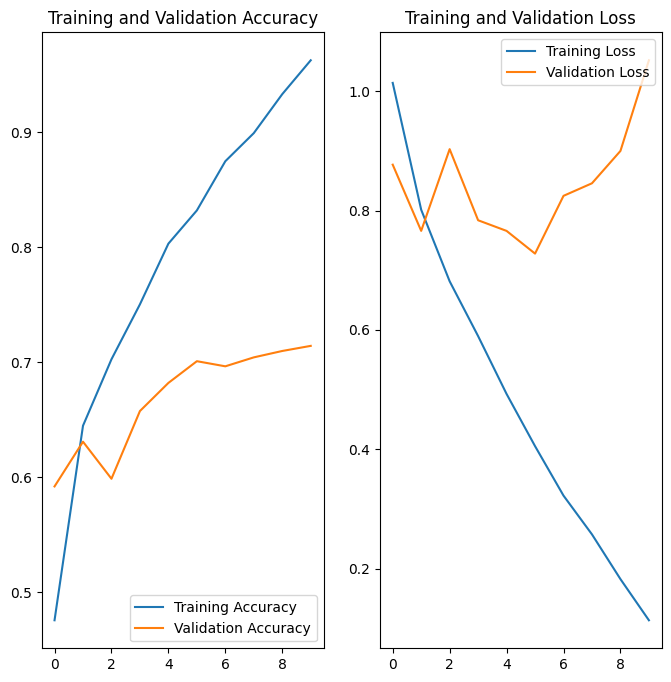

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- overfitting - wzrost dokładności uczenia w sposób liniowy, natomiast dokładność walidacji zatrzymuje się -> oznaka nadmiernego dopasowania


Zadanie 2.

In [9]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
  ]
)

In [10]:
#Stworzenie modelu
num_classes = len(class_names)

model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)])

#Skompilowanie modelu
model2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 4)       112       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 4)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 8)         296       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                  

In [11]:
#Trenowanie
epochs=10
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
120/120 [==============================] - 31s 251ms/step - loss: 1.0543 - accuracy: 0.4272 - val_loss: 1.0007 - val_accuracy: 0.5011
Epoch 2/10
120/120 [==============================] - 30s 250ms/step - loss: 1.0145 - accuracy: 0.4978 - val_loss: 0.9869 - val_accuracy: 0.4856
Epoch 3/10
120/120 [==============================] - 29s 243ms/step - loss: 0.9868 - accuracy: 0.5092 - val_loss: 0.9496 - val_accuracy: 0.5622
Epoch 4/10
120/120 [==============================] - 29s 242ms/step - loss: 0.9739 - accuracy: 0.5244 - val_loss: 0.9664 - val_accuracy: 0.5400
Epoch 5/10
120/120 [==============================] - 29s 242ms/step - loss: 0.9466 - accuracy: 0.5506 - val_loss: 1.0990 - val_accuracy: 0.4933
Epoch 6/10
120/120 [==============================] - 30s 252ms/step - loss: 0.9301 - accuracy: 0.5561 - val_loss: 0.9174 - val_accuracy: 0.5756
Epoch 7/10
120/120 [==============================] - 31s 255ms/step - loss: 0.9171 - accuracy: 0.5683 - val_loss: 0.9492 - val_ac

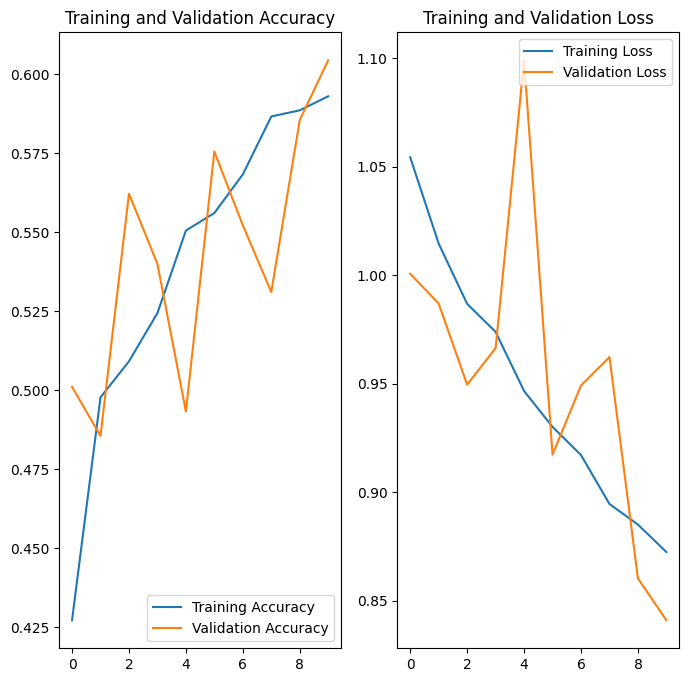

In [12]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Zadanie 2.2

In [13]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
  ]
)

In [14]:
#Stworzenie modelu
num_classes = len(class_names)

model22 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)])

#Skompilowanie modelu
model22.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model22.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 4)       112       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 4)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 8)         296       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                  

In [15]:
#Trenowanie
epochs=20
history22 = model22.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
120/120 [==============================] - 32s 255ms/step - loss: 1.0802 - accuracy: 0.4053 - val_loss: 1.0106 - val_accuracy: 0.4833
Epoch 2/20
120/120 [==============================] - 32s 263ms/step - loss: 1.0203 - accuracy: 0.4839 - val_loss: 0.9758 - val_accuracy: 0.5011
Epoch 3/20
120/120 [==============================] - 29s 242ms/step - loss: 0.9926 - accuracy: 0.5156 - val_loss: 0.9866 - val_accuracy: 0.4856
Epoch 4/20
120/120 [==============================] - 29s 245ms/step - loss: 0.9668 - accuracy: 0.5333 - val_loss: 0.9287 - val_accuracy: 0.5589
Epoch 5/20
120/120 [==============================] - 29s 242ms/step - loss: 0.9511 - accuracy: 0.5533 - val_loss: 0.9431 - val_accuracy: 0.5222
Epoch 6/20
120/120 [==============================] - 30s 251ms/step - loss: 0.9340 - accuracy: 0.5581 - val_loss: 0.9455 - val_accuracy: 0.5400
Epoch 7/20
120/120 [==============================] - 29s 242ms/step - loss: 0.9019 - accuracy: 0.5761 - val_loss: 0.9045 - val_ac

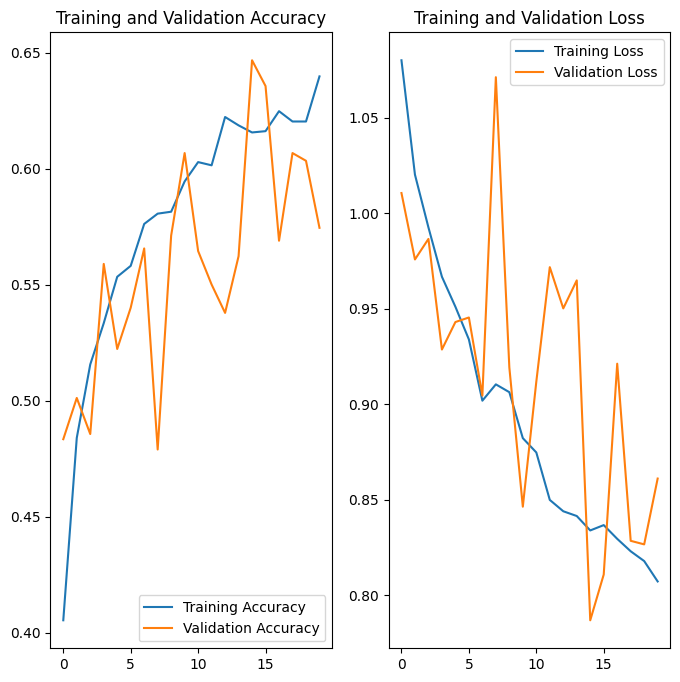

In [16]:
acc = history22.history['accuracy']
val_acc = history22.history['val_accuracy']

loss = history22.history['loss']
val_loss = history22.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()